In [ ]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# img = Image.open("/content/data/bird_small.png")
# rgb_values = list(img.getdata())
# df = pd.DataFrame(rgb_values, columns=['R', 'G', 'B'])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


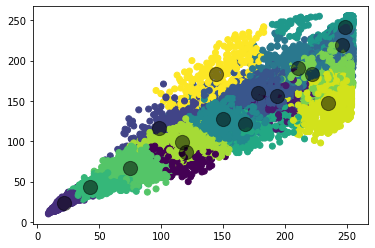

In [ ]:
# Load image
image = Image.open("/content/data/bird_small.png")
image = np.array(image)

# Flatten array of RGB values
h, w, d = tuple(image.shape)
image_data = np.reshape(image, (h * w, d))

# Cluster data points using K-means
kmeans = KMeans(n_clusters=16).fit(image_data)
colors = kmeans.cluster_centers_.astype(int)

# Replace each pixel with closest centroid
labels = kmeans.predict(image_data)

# Extract the cluster assignments for each data point
labels = kmeans.labels_

# Plot the data points with different colors based on their cluster assignment
plt.scatter(image_data[:, 0], image_data[:, 1], c=labels, cmap='viridis')

# Plot the cluster centers as black circles
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.show()

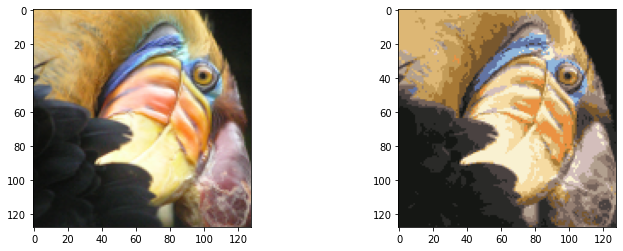

In [ ]:
compressed_image = np.reshape(colors[labels], (h, w, d))

# Display compressed image
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(img)
axs[1].imshow(compressed_image)